In [132]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

In [133]:
# import unicodedata

# with open('tolstoy.txt', 'r', encoding='utf-8') as file:
#     text = file.read()

# text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')

# # print(text)

In [134]:
with open("tolstoy.txt", "r", encoding="utf-8") as f:
    words = f.read().split()
    for i in range(0, len(words), 15):
        print(" ".join(words[i:i+15]))
        print()

THREE QUESTIONS It once occurred to a certain king, that if he always knew the

right time to begin everything; if he knew who were the right people to listen

to, and whom to avoid; and, above all, if he always knew what was the

most important thing to do, he would never fail in anything he might undertake. And

this thought having occurred to him, he had it proclaimed throughout his kingdom that he

would give a great reward to any one who would teach him what was the

right time for every action, and who were the most necessary people, and how he

might know what was the most important thing to do. And learned men came to

the King, but they all answered his questions differently. In reply to the first question,

some said that to know the right time for every action, one must draw up

in advance, a table of days, months and years, and must live strictly according to

it. Only thus, said they, could everything be done at its proper time. Others declared

that it was impossible to d

In [135]:
"""
sonnets.txt dosyası okunur ve okunan veri data değişkeninde depolanır.
Okunan veri küçük harflere dönüştürülür ve yeni bir değişkene corpus aktarılır.

"""
SONNETS_FILE = './tolstoy.txt'
with open('./tolstoy.txt', encoding="utf-8") as f:
    data = f.read()
    
corpus = data.lower().split("\n")
print(corpus)

print(data is corpus)
print("corpus len:",len(corpus))
print("\ndata len:",len(data))

print("")

# for i in range(5):
#     print(corpus[i])

# print("")
    
# for i in range(5):
#     print(data[i])

['three questions it once occurred to a certain king, that if he always knew the', '', 'right time to begin everything; if he knew who were the right people to listen', '', 'to, and whom to avoid; and, above all, if he always knew what was the', '', 'most important thing to do, he would never fail in anything he might undertake. and', '', 'this thought having occurred to him, he had it proclaimed throughout his kingdom that he', '', 'would give a great reward to any one who would teach him what was the', '', 'right time for every action, and who were the most necessary people, and how he', '', 'might know what was the most important thing to do. and learned men came to', '', 'the king, but they all answered his questions differently. in reply to the first question,', '', 'some said that to know the right time for every action, one must draw up', '', 'in advance, a table of days, months and years, and must live strictly according to', '', 'it. only thus, said they, could everything be d

In [136]:

"""
corpus'taki kelimeleri sayılması ve Tokenizer'a sığdırılması.
Tokenizer nesnesi oluşturulur ve fit_on_texts() yöntemiyle corpusa uygun belirteçleyici
ayarlanır. Toplam kelime sayısı da belirlenir.
"""
#Tokenizing the text
#Now fit the Tokenizer to the corpus and save the total number of words.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words= len(tokenizer.word_index) +1

print("\ntokenizer", tokenizer)
print("\ntokenizer.fit_on_texts(corpus)", tokenizer.fit_on_texts(corpus))
print("\ntotal_words", total_words)

print("corpus[0]:\n",corpus[0])

tokenizer.texts_to_sequences(corpus)

print("\ntexts_to_sequences corpus[0]:\n",tokenizer.texts_to_sequences(corpus[0]))

tokenizer.texts_to_sequences([corpus[0]])
#Bunun nedeni, texts_to_sequences'ın bir liste beklemesi ve sizin bir dizi sağlamanızdır.
# Bununla birlikte, Python'da bir dize hala ve yinelenebilir olduğundan, dizedeki her karakterin
# sözcük dizinini alınır.

# Bunun yerine, örneği yönteme geçirmeden önce bir listeye yerleştirmek gerekir:

tokenizer.texts_to_sequences([corpus[0]])[0]
# Diziyi bir liste içine sarılmış olarak aldığınıza dikkat edilmeli,
# bu nedenle yalnızca istenen diziyi elde etmek için listedeki ilk öğeyi
# şu şekilde açıkça almak gerekir:


tokenizer.texts_to_sequences([corpus[0]])[0][2]


tokenizer <keras.preprocessing.text.Tokenizer object at 0x0000016B778ECE80>

tokenizer.fit_on_texts(corpus) None

total_words 1872
corpus[0]:
 three questions it once occurred to a certain king, that if he always knew the

texts_to_sequences corpus[0]:
 [[], [], [], [], [], [], [], [], [], [], [], [19], [], [], [], [], [19], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [5], [], [], [], [], [], [5], [19], [], [], [], [19], [], [], [], [], [], [], [5], [], [], [19], [], [], [], [], [], [5], [], [], [5], [], [], [], [], [], [], [], [], [], [], []]


7

In [137]:
"""
Bu işlev, uygun belirteçleyiciyi ve korpusu (dizelerin bir listesi olan) alır ve
korpustakiher satır için n_gram dizilerini içeren bir liste döndürür

n_gram_seqs() fonksiyonu, korpustaki her satır için n_gram dizileri içeren bir liste 
döndürür. Her satırın her kelimesi ayrı ayrı belirteçlerle işaretlenir. input_sequences 
adlı bir dizi oluşturulur ve her öğe, sonraki kelimeyi tahmin etmek için kullanılan bir 
girdi dizisidir.

"""

def n_gram_seqs(corpus, tokenizer):
    """
    Generates a list of n-gram sequences
    
    Args:
        corpus (list of string): lines of texts to generate n-grams for
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    
    Returns:
        input_sequences (list of int): the n-gram sequences for each line in the corpus
    """
    input_sequences = []


    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
            
    return input_sequences

print("tokenizer", tokenizer, "")
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence



tokenizer <keras.preprocessing.text.Tokenizer object at 0x0000016B778ECE80> 
n_gram sequences for first example look like this:



[[151, 165],
 [151, 165, 7],
 [151, 165, 7, 287],
 [151, 165, 7, 287, 575],
 [151, 165, 7, 287, 575, 3],
 [151, 165, 7, 287, 575, 3, 5],
 [151, 165, 7, 287, 575, 3, 5, 576],
 [151, 165, 7, 287, 575, 3, 5, 576, 52],
 [151, 165, 7, 287, 575, 3, 5, 576, 52, 11],
 [151, 165, 7, 287, 575, 3, 5, 576, 52, 11, 48],
 [151, 165, 7, 287, 575, 3, 5, 576, 52, 11, 48, 4],
 [151, 165, 7, 287, 575, 3, 5, 576, 52, 11, 48, 4, 139],
 [151, 165, 7, 287, 575, 3, 5, 576, 52, 11, 48, 4, 139, 243],
 [151, 165, 7, 287, 575, 3, 5, 576, 52, 11, 48, 4, 139, 243, 1]]

In [138]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, tokenizer)

# Save max length 
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 10016
maximum length of sequences is: 18


In [139]:
"""
pad_seqs() fonksiyonu, girdi dizilerinin maksimum uzunluğuna göre sıfırlarla dolu bir 
dizi oluşturur."""
# GRADED FUNCTION: pad_seqs
def pad_seqs(input_sequences, maxlen):
    """
    Pads tokenized sequences to the same length
    
    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences
    
    Returns:
        padded_sequences (array of int): tokenized sequences padded to the same length
    """

    max_sequence_len = max([len(x) for x in input_sequences])
    padded_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    return padded_sequences

# Pad the whole corpus
input_sequences = pad_seqs(input_sequences, max_sequence_len)

In [140]:
"""
Burada, features_and_labels() fonksiyonu, girdi olarak bir dizi input_sequences ve 
total_words sayısını alır. Bu fonksiyon, öznitelikleri ve etiketleri depolamak için 
boş listeler oluşturur ve her bir girdi dizisi için öznitelikleri ve etiketleri ayarlar

Bu fonksiyon, bir dizi girdi cümlesini ve toplam kelime sayısını alır ve bu cümlelerin
özelliklerini (features) ve etiketlerini (labels) döndürür.

Özellikler, modelin öğrenirken kullanacağı veri özellikleridir. Bu özellikler, kelime sıklıkları
olarak tanımlanır. Her bir girdi cümlesindeki her kelimenin sıklığı, cümle sayısı kadar bir dizi
oluşturulur. Bu dizilerin her biri, bir girdi cümlesindeki kelime sıklıklarını temsil eder.

Etiketler, modele eğitim sırasında doğru cevabı bildiren verilerdir. Bu durumda, etiketler,
her girdi cümlesindeki sonraki kelime olacaktır. .
"""

# GRADED FUNCTION: features_and_labels
def features_and_labels(input_sequences, total_words):
    """
    Generates features and labels from n-grams
    
    Args:
        input_sequences (list of int): sequences to split features and labels from
        total_words (int): vocabulary size
    
    Returns:
        features, one_hot_labels (array of int, array of int): arrays of features and one-hot encoded labels
    """

    features = input_sequences[:, :-1]
    labels = input_sequences[:, -1]
    one_hot_labels = to_categorical(labels, num_classes=total_words)


    return features, one_hot_labels

# Split the whole corpus
features, labels = features_and_labels(input_sequences, total_words)

In [141]:
"""
Bu kod bloğu bir metin üretici modeli oluşturan bir fonksiyon içeriyor. 
Bu model, bir dizi kelime girdisi aldığında sonraki kelimeyi tahmin edebilir. 
Bu, doğal dil işleme, dil modelleme ve makine öğrenmesi alanlarında yaygın olarak 
kullanılan bir tekniktir.

Fonksiyon, Keras kütüphanesinde bulunan bir Model sınıfı nesnesi döndürür. 
Model, önceden tanımlanmış bir Embedding katmanı, bir Bidirectional LSTM katmanı 
ve bir Dense (tamamen bağlı) katmanı içerir. Embedding katmanı, girdi kelime dizilerinin 
gömülü temsillemelerini hesaplar. Bu gömülü temsillemeler, girdi kelime dizilerinin 
sayısal gösterimleridir. Bidirectional LSTM katmanı, girdi dizisindeki her kelimenin 
gömülü temsillemesini alır ve önceki ve sonraki kelimelerin bağlamını göz önünde 
bulundurarak sonraki kelimeyi tahmin eder. Dense katmanı, LSTM katmanının çıktısını 
alır ve her kelime için bir olasılık vektörü üretir.

Son olarak, model, kayıp fonksiyonu, optimize edici ve doğruluk metriği olarak sırasıyla 
"categorical_crossentropy", "adam" ve "accuracy" değerlerini kullanarak derlenir.
"""
# GRADED FUNCTION: create_model
def create_model(total_words, max_sequence_len):
    """
    Creates a text generator model
    
    Args:
        total_words (int): size of the vocabulary for the Embedding layer input
        max_sequence_len (int): length of the input sequences
    
    Returns:
        model (tf.keras Model): the text generator model
    """
    model = Sequential()

    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    model.add(Bidirectional(LSTM(150)))
    model.add(Dense(total_words, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


    return model


Epoch 1/50
313/313 [==============================] - 6s 12ms/step - loss: 6.3239 - accuracy: 0.0615
Epoch 2/50
313/313 [==============================] - 4s 12ms/step - loss: 5.8546 - accuracy: 0.0715
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 5.6442 - accuracy: 0.0775
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 5.4157 - accuracy: 0.0888
Epoch 5/50
313/313 [==============================] - 4s 11ms/step - loss: 5.1262 - accuracy: 0.1110
Epoch 6/50
313/313 [==============================] - 4s 11ms/step - loss: 4.8092 - accuracy: 0.1271
Epoch 7/50
313/313 [==============================] - 4s 11ms/step - loss: 4.4818 - accuracy: 0.1439
Epoch 8/50
313/313 [==============================] - 4s 11ms/step - loss: 4.1456 - accuracy: 0.1681
Epoch 9/50
313/313 [==============================] - 4s 11ms/step - loss: 3.8014 - accuracy: 0.2048
Epoch 10/50
313/313 [==============================] - 4s 11ms/step - loss: 3.4687 - accura

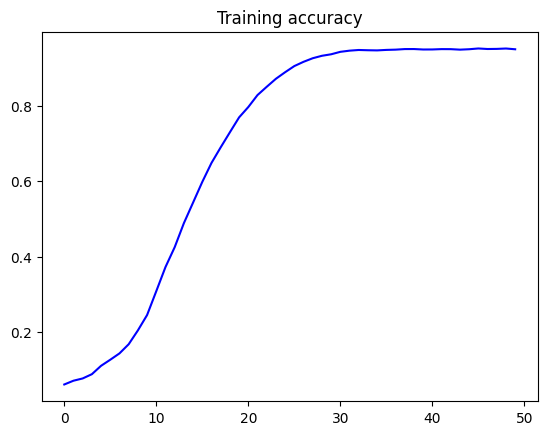

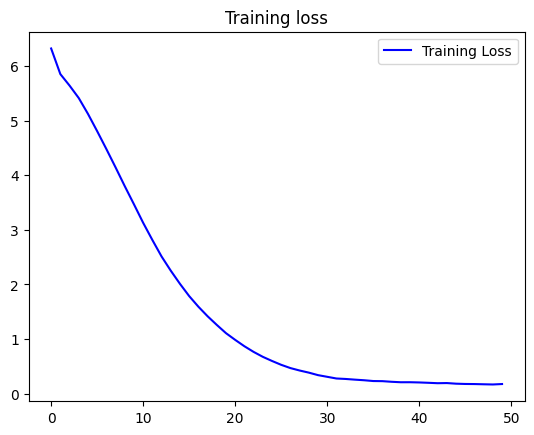

In [142]:
# Get the untrained model
model = create_model(total_words, max_sequence_len)

# Train the model
history = model.fit(features, labels, epochs=50, verbose=1)

# Take a look at the training curves of your model

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [147]:
# seed_text = "Help me Obi Wan Kenobi, you're my only hope"
seed_text = "The king looked behind him and the sun was starting to set behind the trees, and then he thought:"
next_words = 100
  
for _ in range(next_words):
    # Convert the text into sequences
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad the sequences
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Get the probabilities of predicting a word
    predicted = model.predict(token_list, verbose=0)
    # Choose the next word based on the maximum probability
    predicted = np.argmax(predicted, axis=-1).item()
    # Get the actual word from the word index
    output_word = tokenizer.index_word[predicted]
    # Append to the current text
    seed_text += " " + output_word
print(seed_text)



The king looked behind him and the sun was starting to set behind the trees, and then he thought: then again was more more kumiss he had to ask at the corner close for we just all by gazing more so that he had gone done in the country of all so that there was some of the cannot way for when he had not used and two acres far than a steward who had lost found and was hand and he was used and two near so he had a six turned where he had a wick from gazing scene you was done him and rose and his man went to fail in pahom had a peasant he
